In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["font.family"] = "Arial"
# from skimage import measure
import pyvista as pv
pv.set_jupyter_backend('trame')
from tqdm import tqdm, trange
from scipy import interpolate, ndimage, fft
from scipy.io import savemat
from time import time
from PIL import Image
from scipy.interpolate import splrep, splev


In [2]:
# random seed
np.random.seed(1145142)

## Define function

In [3]:
from Vortex import *

## 1. Locate defect

In [4]:
## Generate random wave
## Meshgrid
n_grid = 160
x = np.linspace(-1,1,n_grid+1)
y = np.linspace(-1,1,n_grid+1)
z = np.linspace(-1,1,n_grid+1)

r_grid = np.meshgrid(x,y,z) 

## Random wave
sigma_k = 0.2
kappa = 128
alpha = 0

#### Wave vector distribution ####
scale = 4
k_mean_z = np.array([0,0,scale])*2*np.pi # lamellar perpendicular to z axis 
# k_mean_x = np.array([0,0,0])*np.pi # lamellar perpendicular to z axis 
k_var  = (np.array([0,0,sigma_k*scale])*2*np.pi)**2
k_cov  = np.diagflat(k_var)

rho = sample_wave_MO_complex(r_grid,k_mean_z,k_cov,n_wave = 100, kappa=kappa)

n_grid_scale = 400
scale_zoom = n_grid_scale/rho.shape[0]

def scale_rho(rho, r_grid, scale):
    rho = ndimage.zoom(rho, scale, order=1)
    r_grid = np.array([ndimage.zoom(r, scale, order=1) for r in r_grid]) 
    return rho, r_grid

rho, r_grid = scale_rho(rho, r_grid, scale_zoom)

rho_real = rho.real
rho_imag = rho.imag
rho_phase = np.angle(rho)

### Visualize 3D image

In [5]:
vortex_volume = vortex_phase(rho_phase)

visualize_lamellar(r_grid, rho_real, vortex_volume)

100%|██████████| 400/400 [00:04<00:00, 91.22it/s]


Widget(value="<iframe src='http://localhost:65489/index.html?ui=P_0x20549053220_0&reconnect=auto' style='width…

### Call vortex_slice function

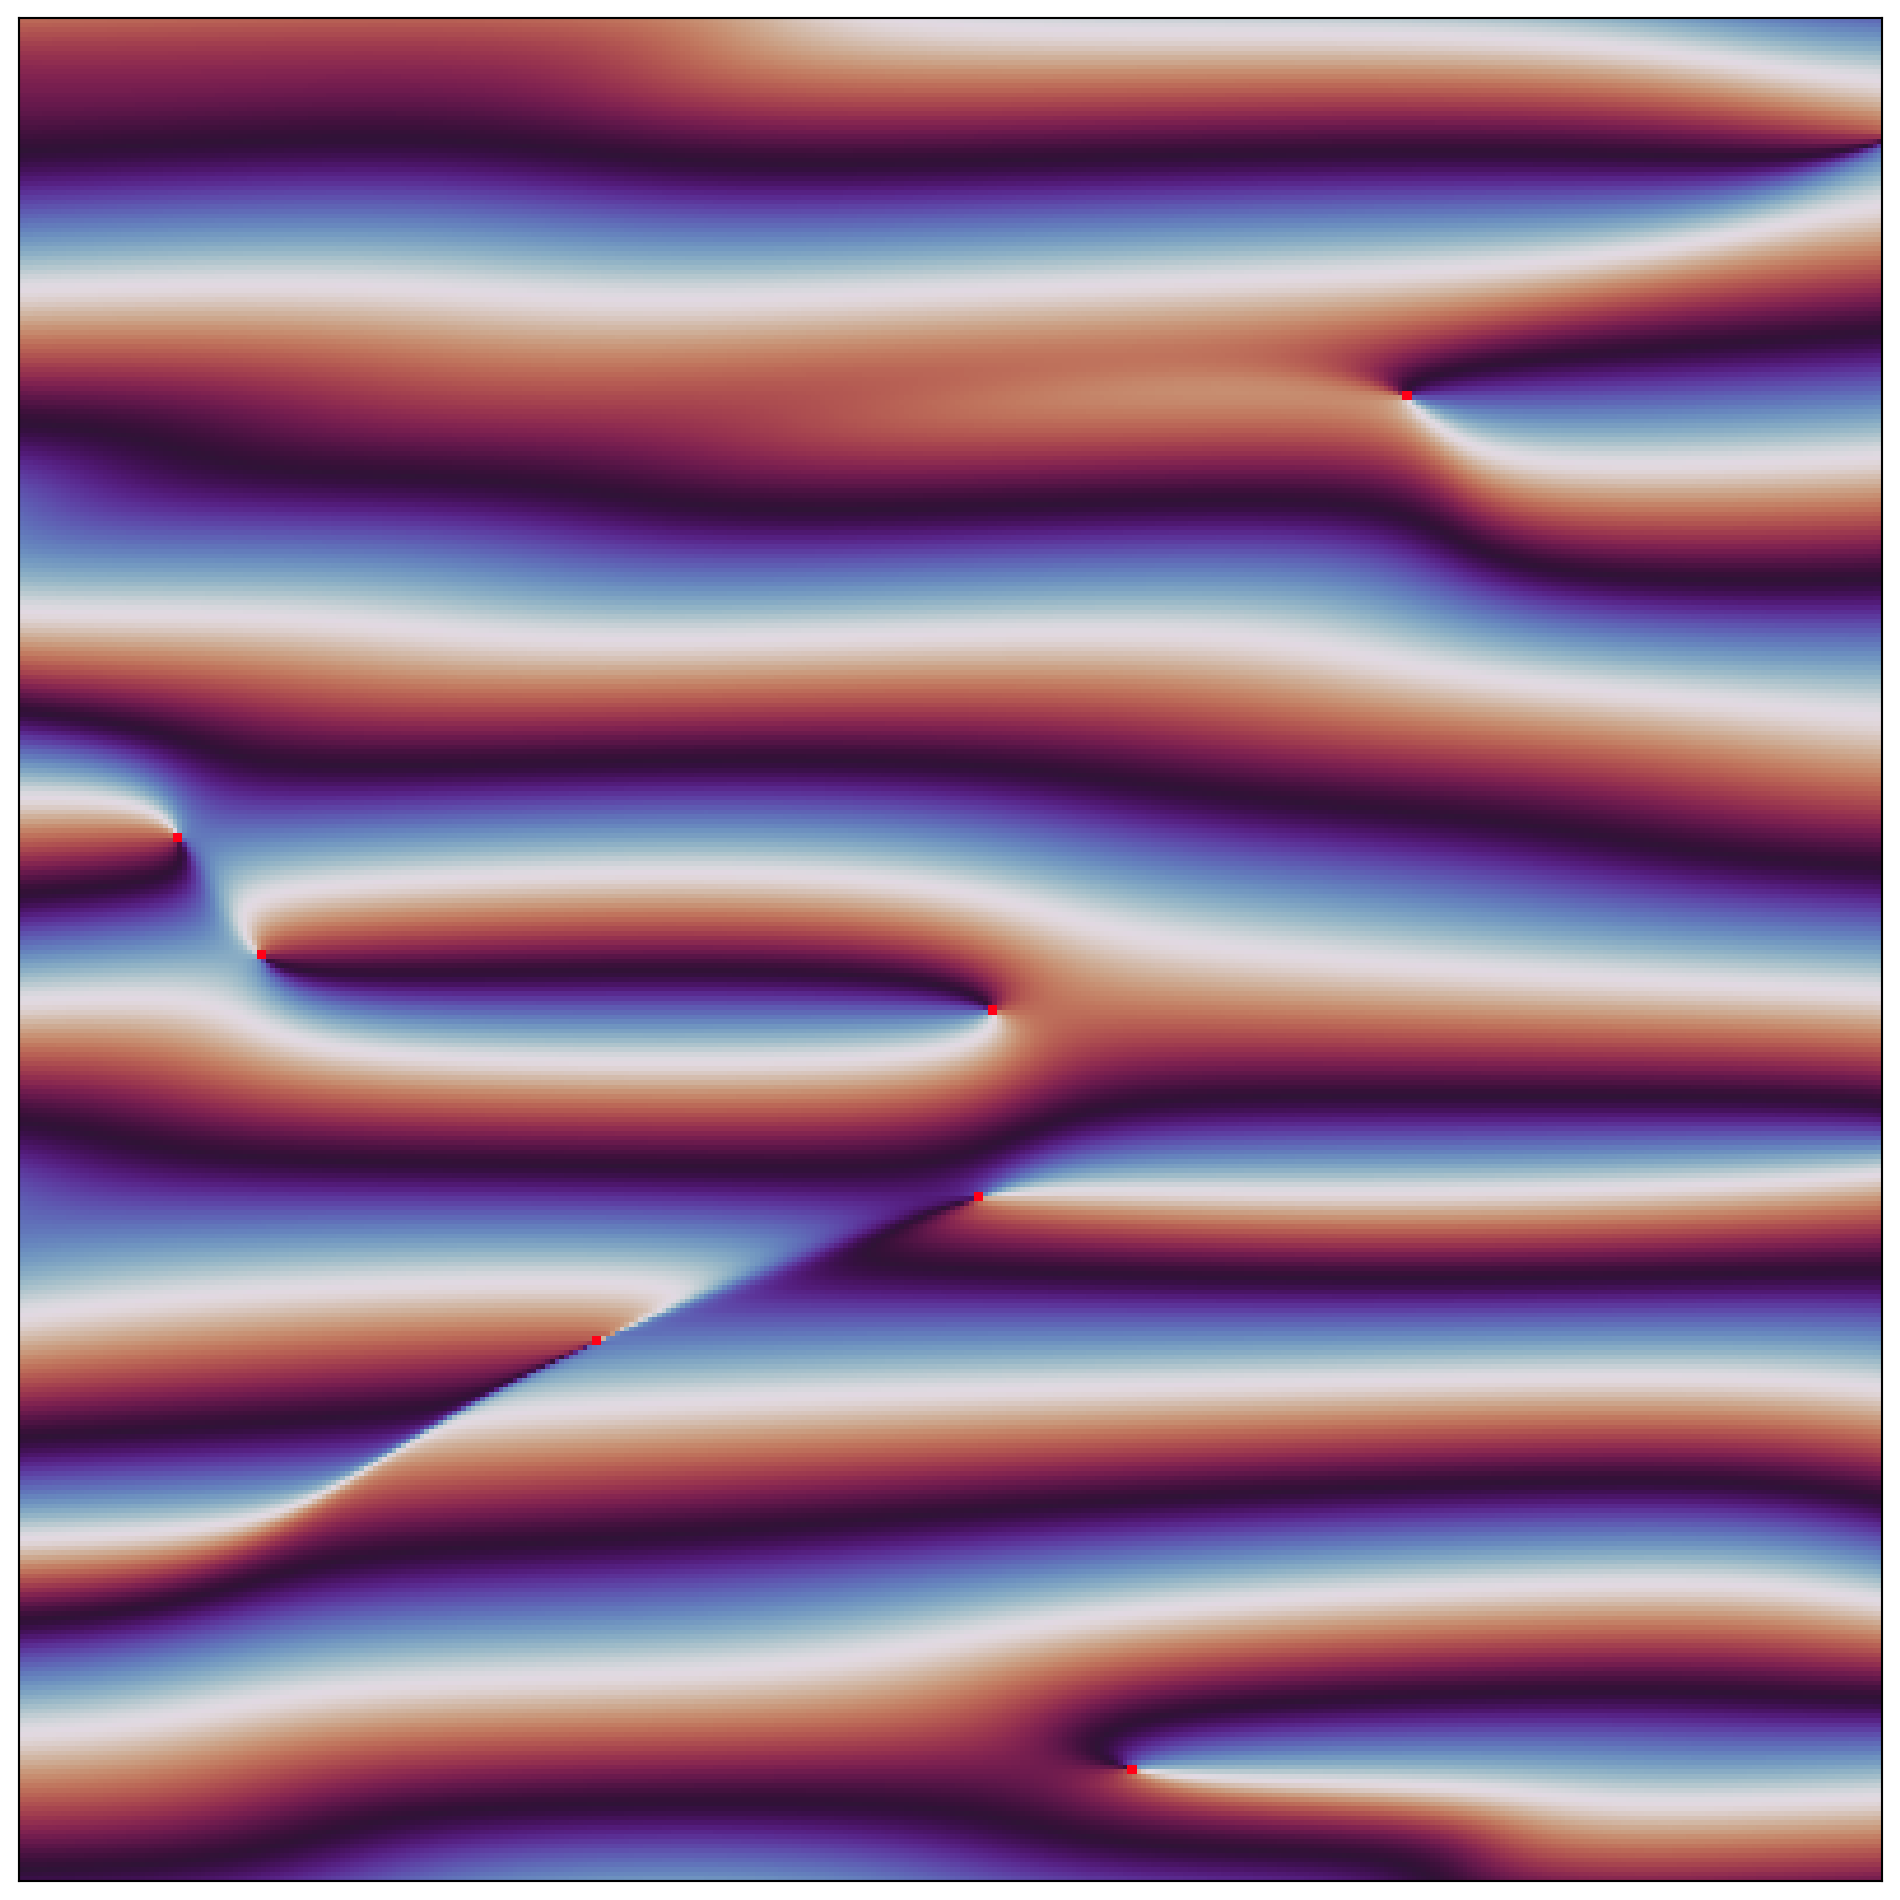

In [6]:
example_slice = rho_phase[0,:,:]
vortex_array = vortex_slice(example_slice)

#### plotting
fig = plt.figure(figsize=(10,10),dpi=192)
ax = fig.add_subplot(1, 1, 1)

ax.imshow(np.flip(example_slice.T,axis=1), vmin=-np.pi, vmax=np.pi, 
          cmap='twilight',interpolation='none',
          origin='lower',extent=[0,400,0,400]
          )
ax.imshow(np.flip(vortex_array.T,axis=1), vmin=0, vmax=1, 
          cmap='hsv',interpolation='none', alpha=np.flip(vortex_array.T,axis=1),
          origin='lower',extent=[0,400,0,400]
          )
# ax.grid(True, which='minor', axis='both', linestyle='-', color='k', lw=2)

ax.set_xticks([])
ax.set_yticks([])

plt.tight_layout()

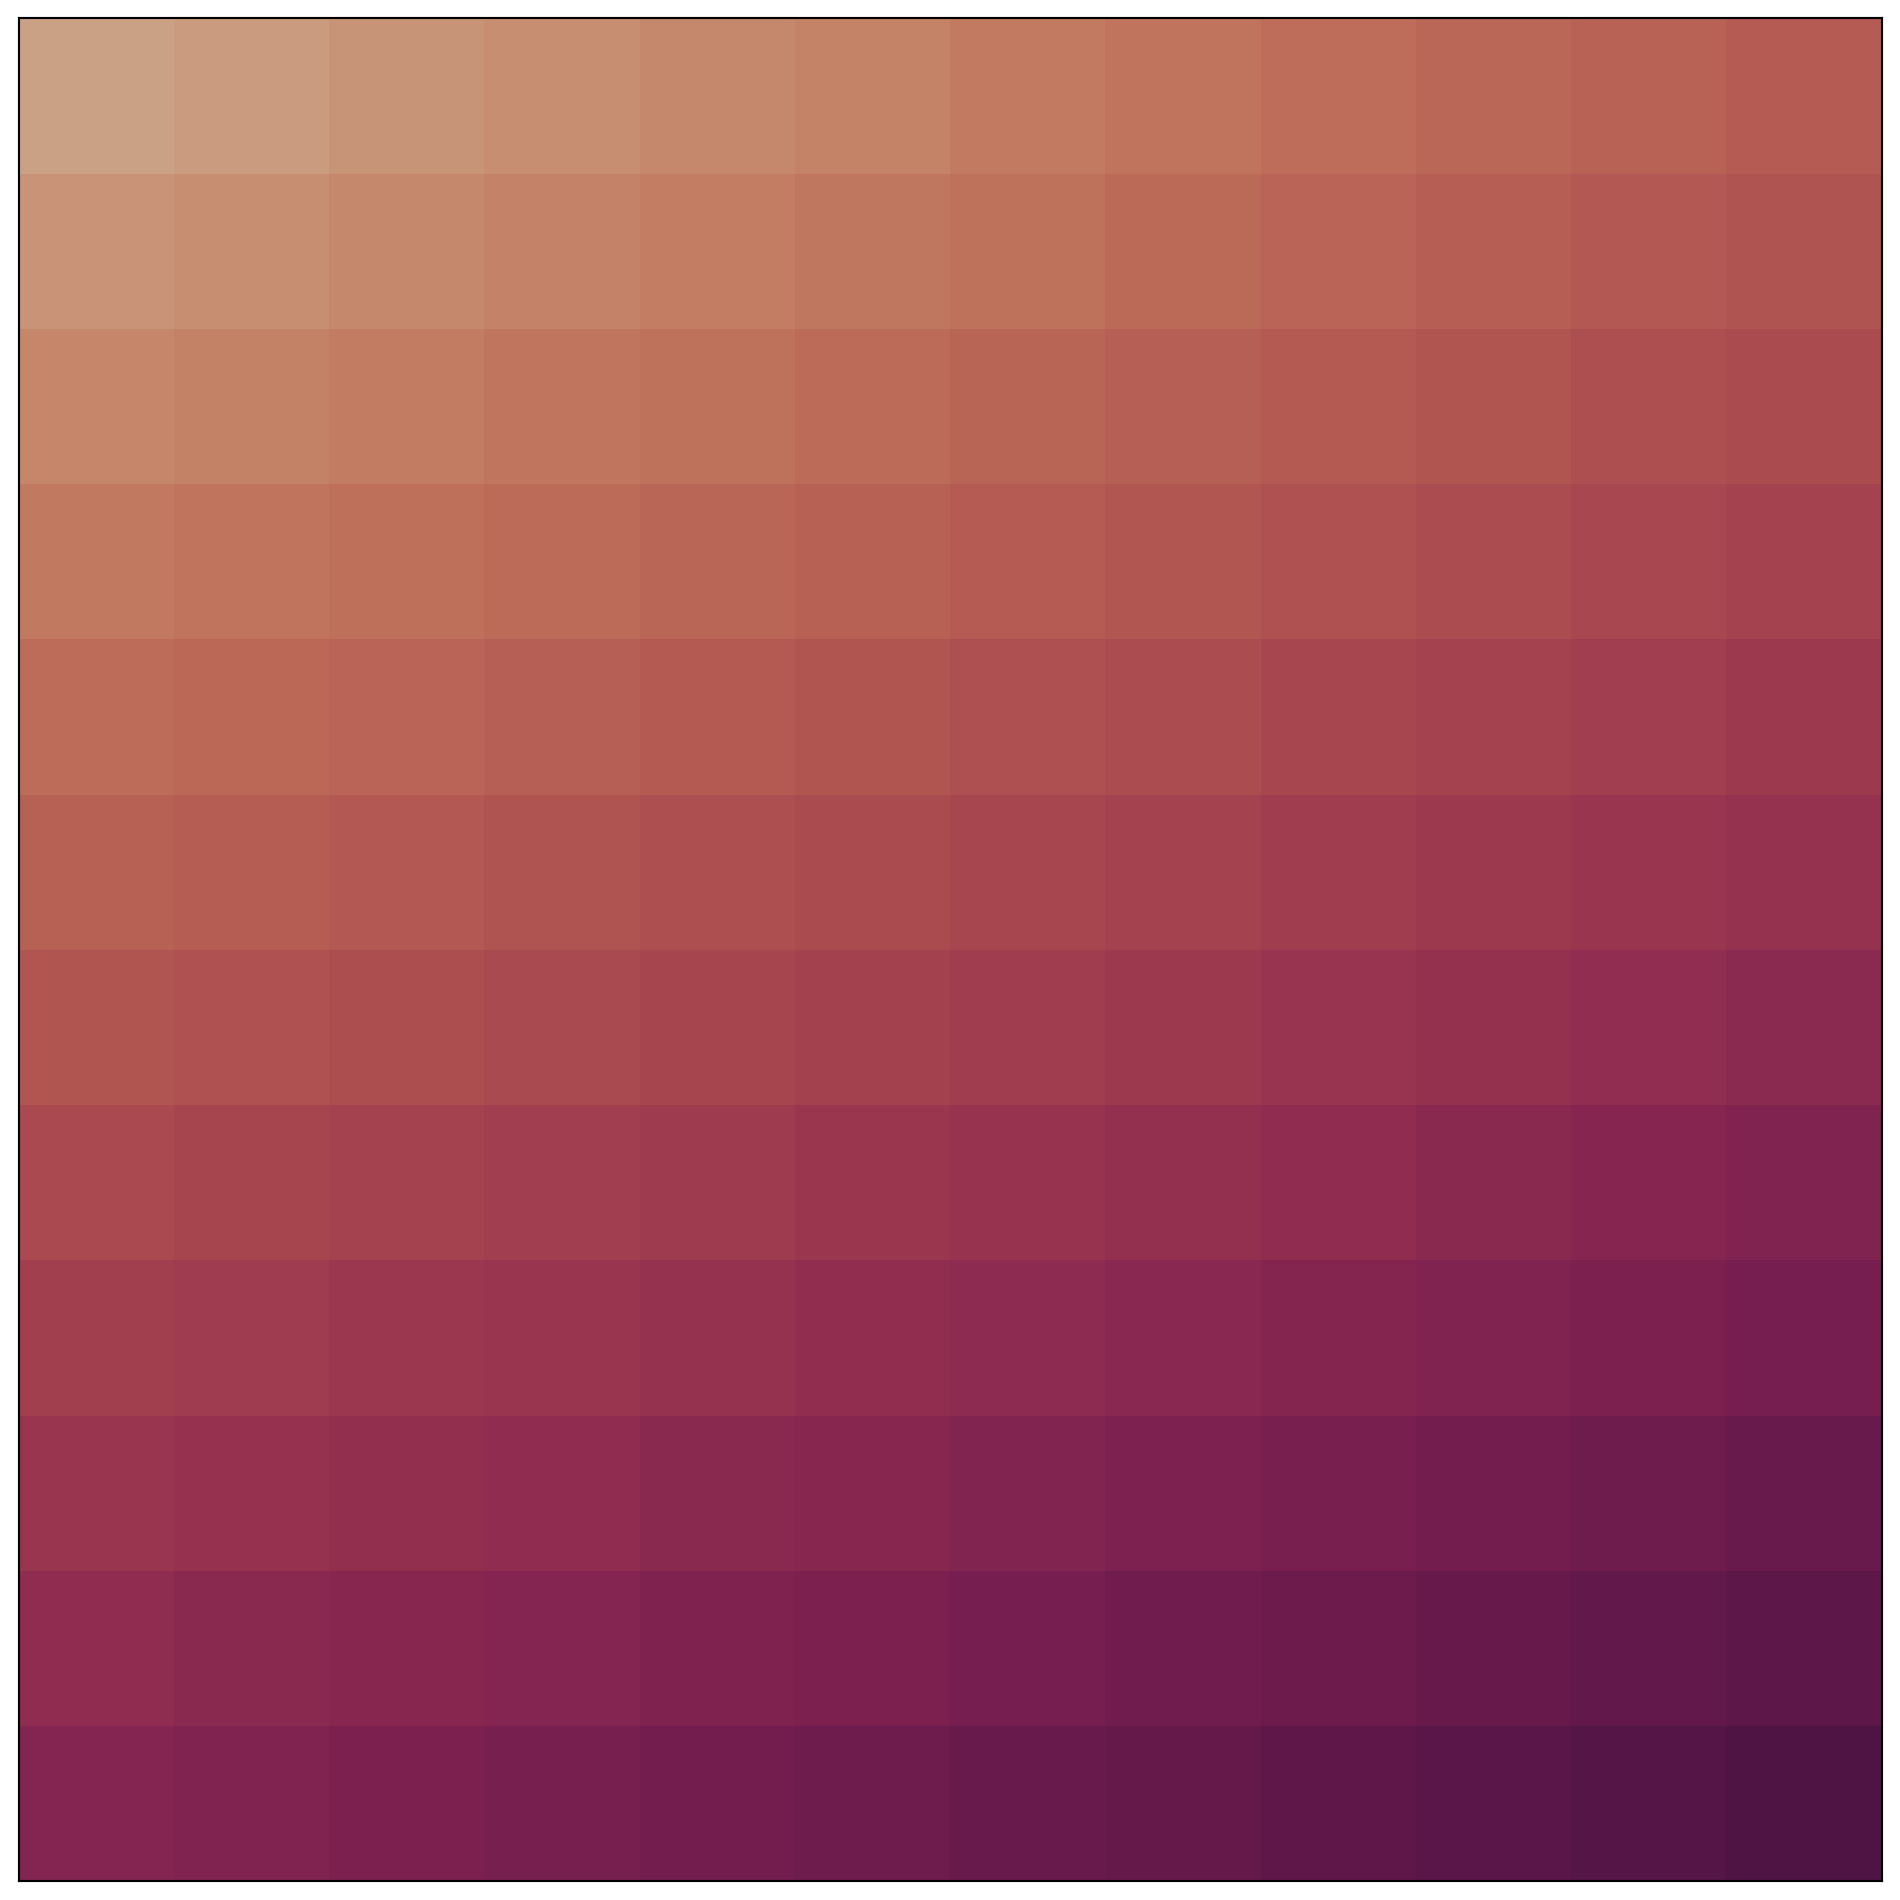

In [7]:
example_slice = rho_phase[0,:,:]
vortex_array = vortex_slice(example_slice)

#### plotting
fig = plt.figure(figsize=(10,10),dpi=192)
ax = fig.add_subplot(1, 1, 1)

ax.imshow(np.flip(example_slice.T,axis=1), vmin=-np.pi, vmax=np.pi, 
          cmap='twilight',interpolation='none',
          origin='lower',extent=[0,400,0,400]
          )
# ax.imshow(np.flip(vortex_array.T,axis=1), vmin=0, vmax=1, 
#           cmap='gray',interpolation='none', alpha=np.flip(vortex_array.T,axis=1)/4,
#           origin='lower',extent=[0,400,0,400]
#           )
# ax.grid(True, which='minor', axis='both', linestyle='-', color='k', lw=2)

ax.set_xticks([])
ax.set_yticks([])

origin = [211,170]
ax.set_xlim([origin[0]-6,origin[0]+6])
ax.set_ylim([origin[1]-6,origin[1]+6])

plt.tight_layout()

### Trace defect lines

In [8]:
array = vortex_volume
positions_tuple_list, positions_list, adjacent_list, adjacent_id_list = get_adjacency(array)
poslist_arr = np.array(positions_tuple_list)

[]

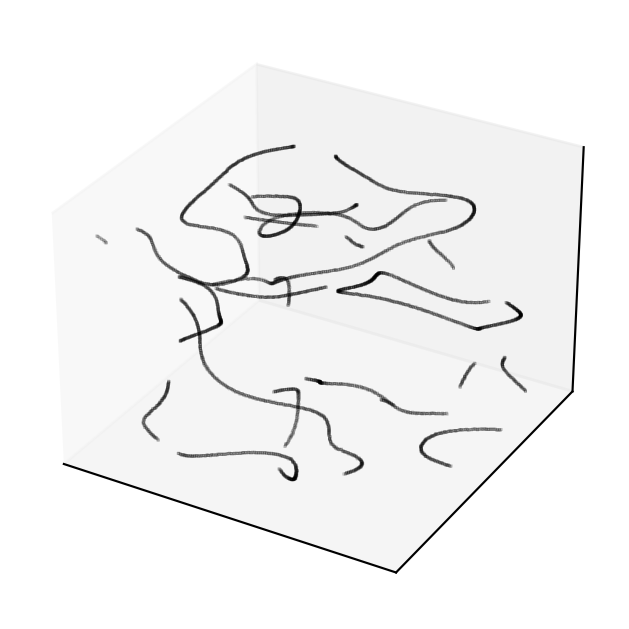

In [9]:
# %matplotlib widget
fig = plt.figure(figsize=(4,4),dpi=192)
ax = fig.add_subplot(1, 1, 1, projection='3d')

# plot defect voxels
ax.plot(poslist_arr[:,0],poslist_arr[:,1],poslist_arr[:,2],'.k',ms=.05)
# ax.scatter(poslist_arr[:,0],poslist_arr[:,1],poslist_arr[:,2],
#     '.',c=parts_arr,s=.1,alpha=1,cmap='rainbow')

# given a sample, plot the sample and its neighbors
index_sample = 12
sample_pos = np.unravel_index(positions_list[index_sample],vortex_volume.shape)
# ax.plot(poslist_arr[index_sample,0],poslist_arr[index_sample,1],poslist_arr[index_sample,2],'r.')
# for adjacent_positions in adjacent_list[index_sample]:
#     neighbor_pos = np.unravel_index(adjacent_positions,vortex_volume.shape)
#     ax.plot(neighbor_pos[0],neighbor_pos[1],neighbor_pos[2],'g.')
# positions_list_array[index_sample]

# for adjacent_id in adjacent_id_list[index_sample]:
#     ax.plot(poslist_arr[adjacent_id,0],poslist_arr[adjacent_id,1],poslist_arr[adjacent_id,2],'sg')
    
#     # adjacent of adjacent 
#     for adjacent_id2 in adjacent_id_list[adjacent_id]:
#         if adjacent_id2==index_sample:
#             continue
#         ax.plot(poslist_arr[adjacent_id2,0],poslist_arr[adjacent_id2,1],poslist_arr[adjacent_id2,2],'xb')
 
# poslist_arr[index_sample]

# ax.set_xlim([sample_pos[0]-6,sample_pos[0]+6])
# ax.set_ylim([sample_pos[1]-6,sample_pos[1]+6])
# ax.set_zlim([sample_pos[2]-6,sample_pos[2]+6])

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

(2, 190, 188)


[]

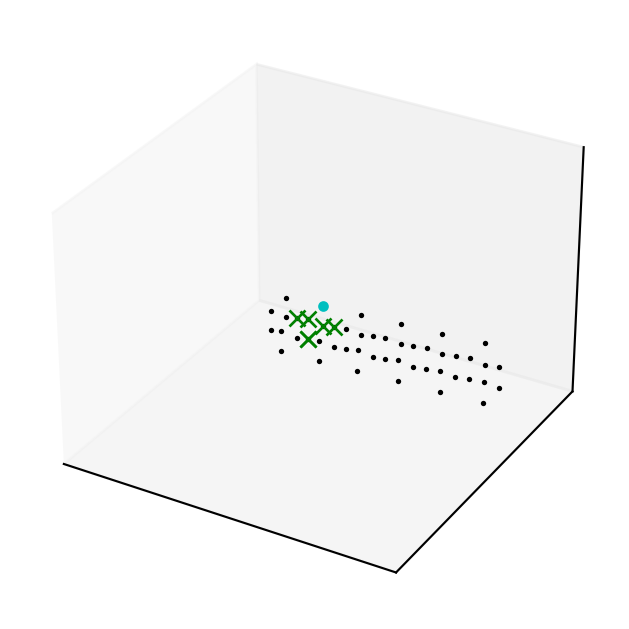

In [10]:
# %matplotlib widget
fig = plt.figure(figsize=(4,4),dpi=192)
ax = fig.add_subplot(1, 1, 1, projection='3d')

# plot defect voxels
ax.plot(poslist_arr[poslist_arr[:,0]<12,0],poslist_arr[poslist_arr[:,0]<12,1],poslist_arr[poslist_arr[:,0]<12,2],'.k',ms=2)
# ax.scatter(poslist_arr[:,0],poslist_arr[:,1],poslist_arr[:,2],
#     '.',c=parts_arr,s=.1,alpha=1,cmap='rainbow')

# # given a sample, plot the sample and its neighbors
index_sample = 72
sample_pos = np.unravel_index(positions_list[index_sample],vortex_volume.shape)
print(sample_pos)
ax.plot(poslist_arr[index_sample,0],poslist_arr[index_sample,1],poslist_arr[index_sample,2],'c.')
# for adjacent_positions in adjacent_list[index_sample]:
#     neighbor_pos = np.unravel_index(adjacent_positions,vortex_volume.shape)
#     ax.plot(neighbor_pos[0],neighbor_pos[1],neighbor_pos[2],'g.')
# positions_list_array[index_sample]

for adjacent_id in adjacent_id_list[index_sample]:
    ax.plot(poslist_arr[adjacent_id,0],poslist_arr[adjacent_id,1],poslist_arr[adjacent_id,2],'xg')
    
    # adjacent of adjacent 
    for adjacent_id2 in adjacent_id_list[adjacent_id]:
        if adjacent_id2==index_sample:
            continue
        ax.plot(poslist_arr[adjacent_id2,0],poslist_arr[adjacent_id2,1],poslist_arr[adjacent_id2,2],'xg')
 
# poslist_arr[index_sample]

ax.set_xlim([sample_pos[0]-6,sample_pos[0]+6])
ax.set_ylim([sample_pos[1]-6,sample_pos[1]+6])
ax.set_zlim([sample_pos[2]-6,sample_pos[2]+6])

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

In [11]:
sample, sample_adj_list, sample_adj_dict = get_core(positions_tuple_list, adjacent_id_list, 
                                                    cluster_size=3)
sample_ordered = get_ordered_points(sample, sample_adj_list)

In [12]:
sample_ordered_sm = []
for line in sample_ordered:
    if len(line)>5:
        x = np.arange(len(line))
        arr_line = np.array(line)
        spl_list = [splrep(x,arr_line[:,i],s=len(line)) for i in range(3)]
        line_sm = np.array([splev(x,spl) for spl in spl_list]).T
        sample_ordered_sm.append(line_sm)
    else:
        sample_ordered_sm.append(line)
    

visualize_defect(r_grid,rho_real,vortex_volume,sample_ordered_sm,lw=2,
    filename = './Figures/schematic/trace.png')

Widget(value="<iframe src='http://localhost:65489/index.html?ui=P_0x2059abb78e0_1&reconnect=auto' style='width…